<a href="https://colab.research.google.com/github/nitingour1203/credit-card-default-prediction/blob/main/credit_card_default_prediction_nitin_gour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  <font size="+2" color='#154085'> <b> 1. About the Dataset

### <b>Dataset Information

<b>In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders

## <font size="+2" color='#154085'> <b> 2. Import libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import os
import sys
warnings.filterwarnings('ignore')

     

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = '/content/default of credit card clients.xls - Data.csv'
dataset= pd.read_csv(df)

In [5]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
dataset.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  

In [8]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There are 2000 distinct credit card clients.

The average value for the amount of credit card limit is 171,825. The standard deviation is unusually large, max value being 730,000.

Education Level is mostly graduate school and university.

Most of the clients are either married or single .

Average age is 35.5 years, with a standard deviation of 9.2

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

In [9]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
dataset.index = dataset['ID']

In [11]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [12]:
dataset.drop('ID',axis=1,inplace=True)

In [13]:
dataset.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1


In [14]:
dataset.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [15]:
dataset['SEX'].value_counts(dropna=False)

2    18112
1    11888
Name: SEX, dtype: int64

In [16]:
dataset['EDUCATION'].value_counts(dropna=False)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [17]:
dataset = dataset.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

## <font size="+2" color='#154085'> <b>3: Data Visualisation and Analysis

Text(0.5, 1.0, 'SEX v/s COUNT')

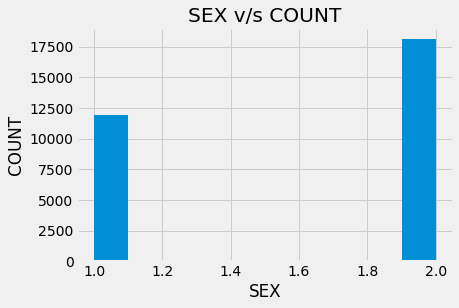

In [19]:
plt.style.use('fivethirtyeight')
dataset['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

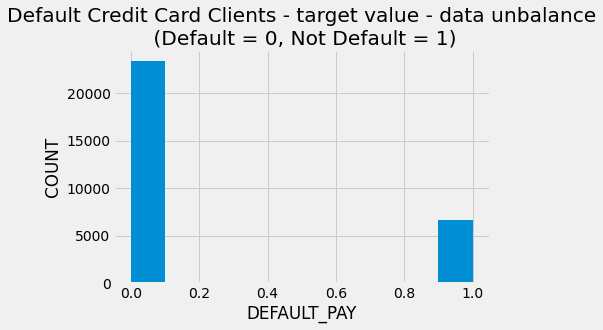

In [20]:
plt.style.use('fivethirtyeight')
dataset['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

<b>Number of Male credit holder is less than Female

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

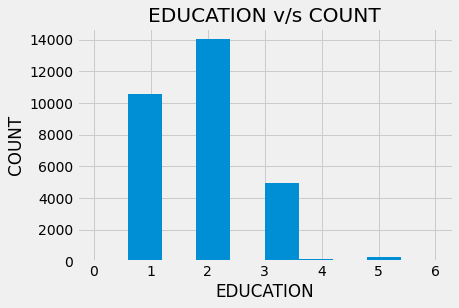

In [21]:
plt.style.use('fivethirtyeight')
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

<b>More number of credit holders are university students followed by Graduates and then High school students

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

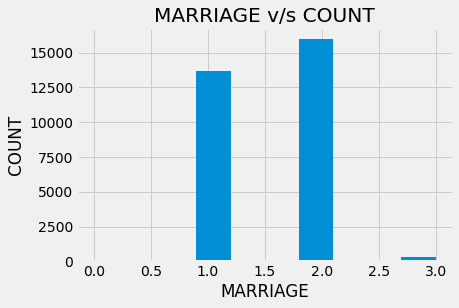

In [22]:
plt.style.use('fivethirtyeight')
dataset['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

More number of credit cards holder are Married

<Axes: xlabel='SEX', ylabel='LIMIT_BAL'>

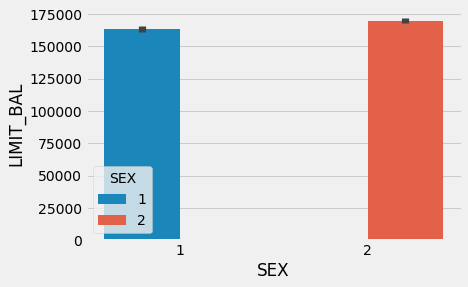

In [23]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=dataset,hue='SEX')

<Axes: xlabel='SEX', ylabel='count'>

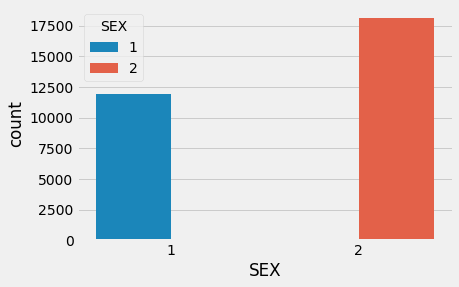

In [24]:
sns.countplot(x='SEX',data=dataset,hue = 'SEX')

<Axes: xlabel='SEX', ylabel='count'>

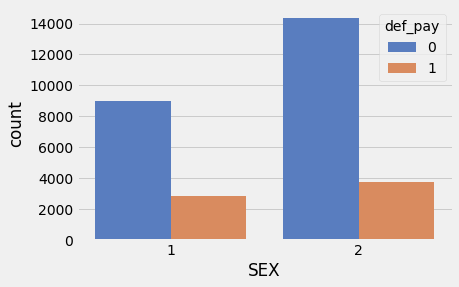

In [25]:
# Checking the number of counts of defaulters and non defaulters sexwise


sns.countplot(x='SEX', data=dataset,hue="def_pay", palette="muted")  

<b>It is evident from the above output that females have overall less default payments wrt males

Non-Defaults have a higher proportion of Females (Sex=2)

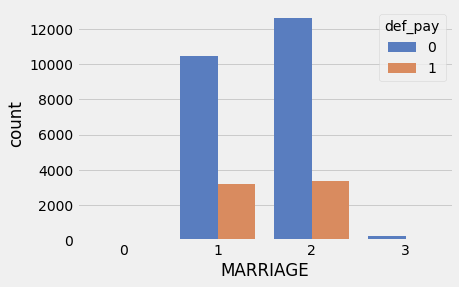

In [26]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="def_pay", palette="muted")

From the above plot it is clear that those people who have marital status single have less default payment wrt married status people

In [27]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

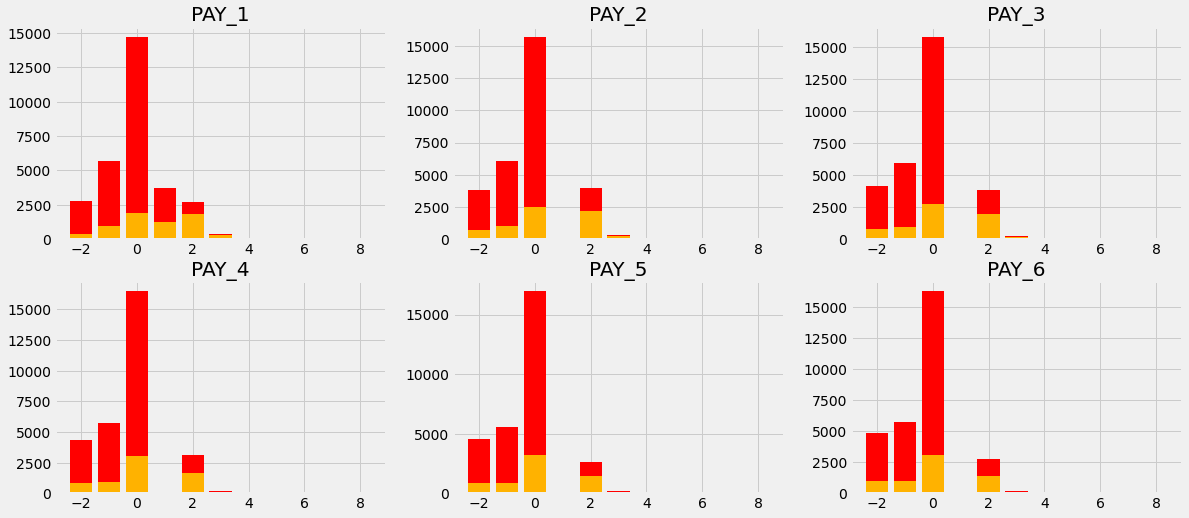

In [28]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][(dataset['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

<b>The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

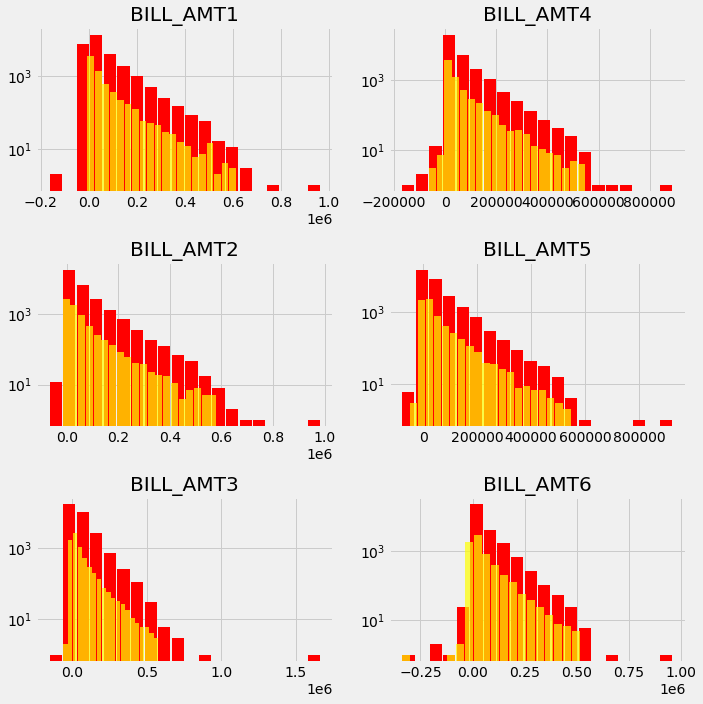

In [29]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(dataset[bill_atm_columns[i]][(dataset['def_pay']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log')
plt.tight_layout()
plt.show()

<b>The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters

<Axes: xlabel='def_pay', ylabel='AGE'>

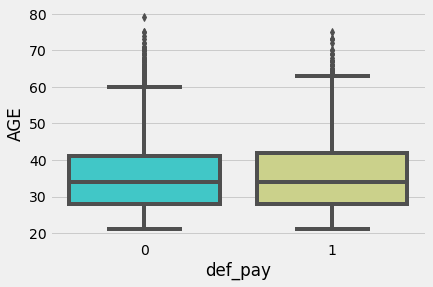

In [30]:
sns.boxplot(x='def_pay',y='AGE',data=dataset,palette='rainbow')

<Axes: xlabel='def_pay', ylabel='AGE'>

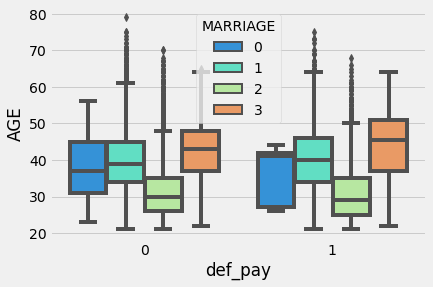

In [31]:
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=dataset,palette="rainbow")

<Axes: xlabel='def_pay', ylabel='AGE'>

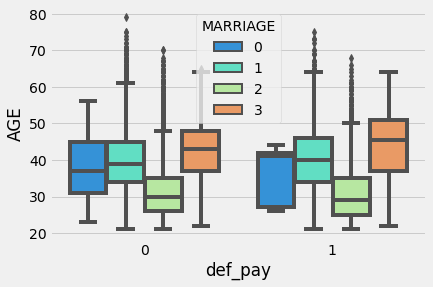

In [32]:
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=dataset,palette="rainbow")

<Axes: xlabel='def_pay', ylabel='AGE'>

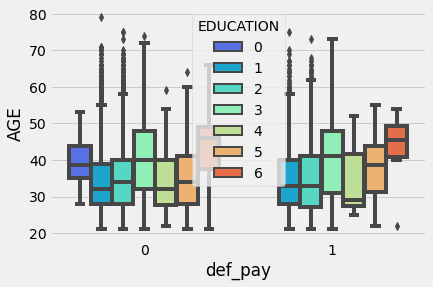

In [33]:
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=dataset,palette="rainbow" )

<Axes: xlabel='SEX', ylabel='LIMIT_BAL'>

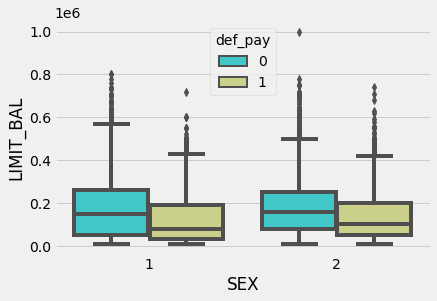

In [34]:
sns.boxplot(x='SEX',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

<Axes: xlabel='EDUCATION', ylabel='LIMIT_BAL'>

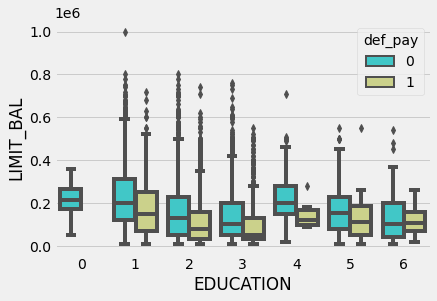

In [35]:
sns.boxplot(x='EDUCATION',hue='def_pay', y='LIMIT_BAL',data=dataset,palette="rainbow")

<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

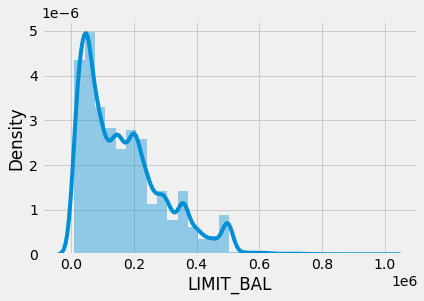

In [36]:
sns.distplot(dataset['LIMIT_BAL'],kde=True,bins=30)

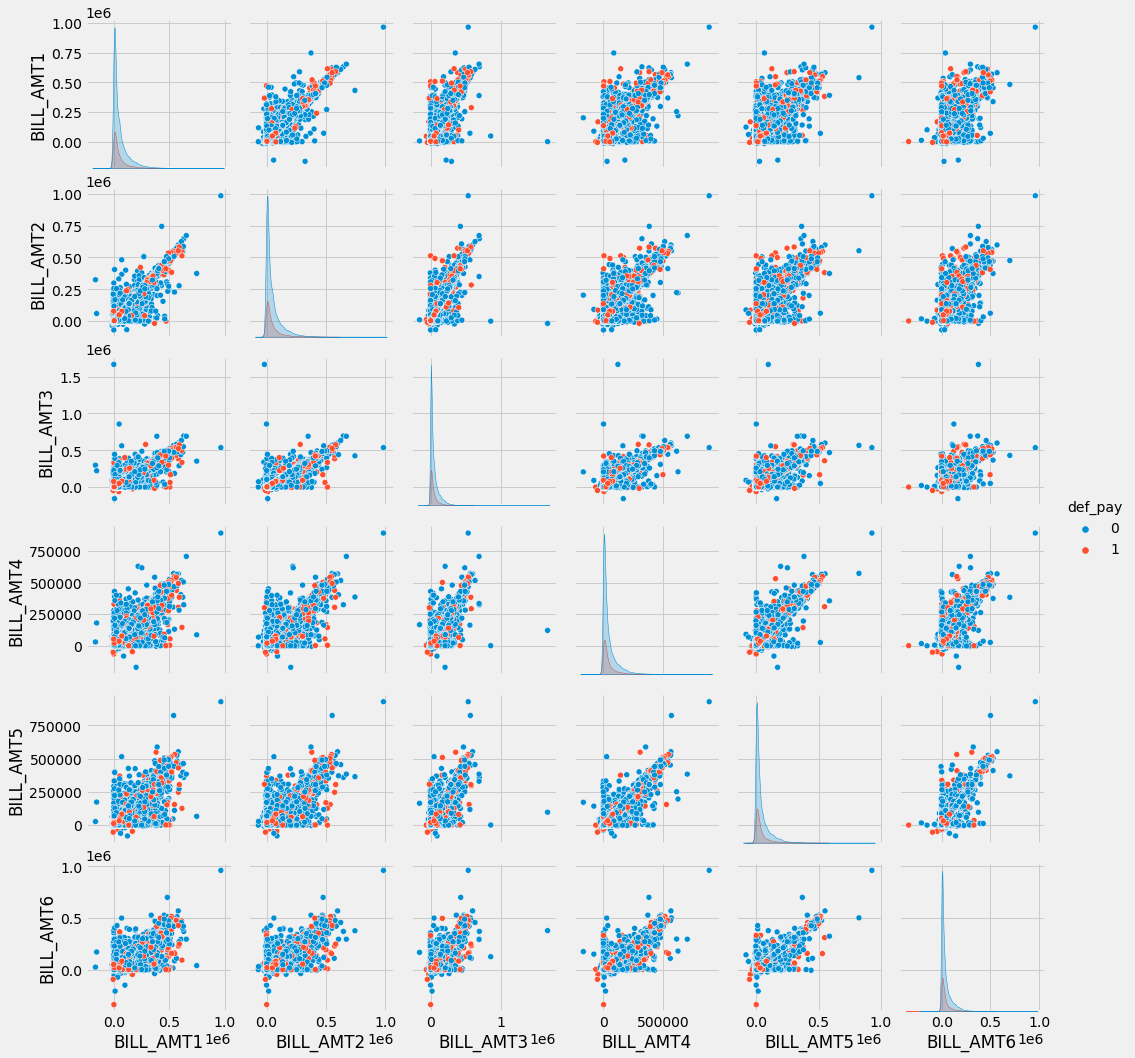

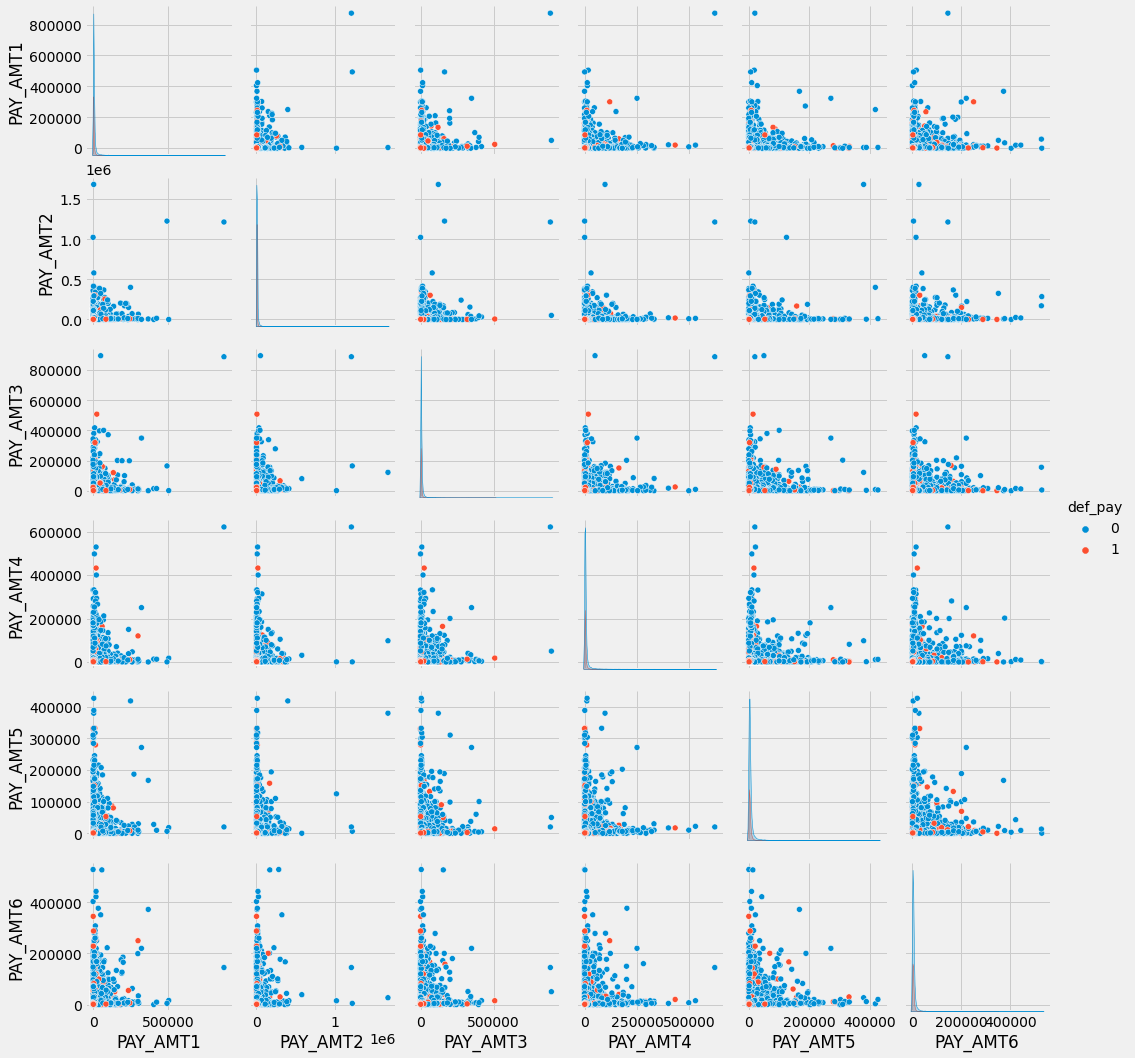

In [37]:
# plot columns with similar names to check the correlation

sns.pairplot(dataset, vars=dataset.columns[11:17], kind='scatter',hue= 'def_pay')
sns.pairplot(dataset, vars=dataset.columns[17:23],hue = 'def_pay')

In [38]:
correlation = dataset.corr()

<Axes: >

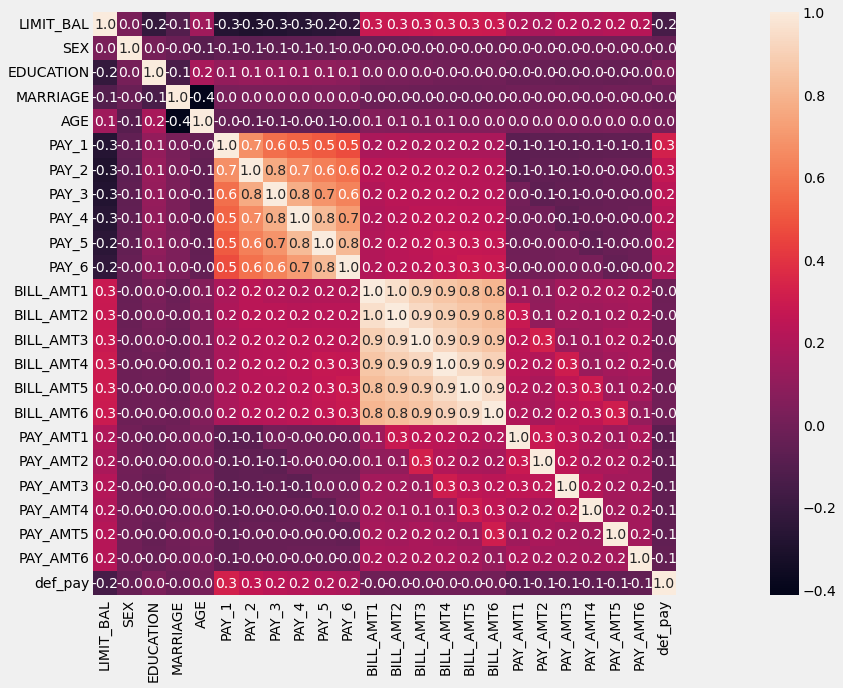

In [39]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  

<b>So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

<Axes: title={'center': 'Correlation with Default'}>

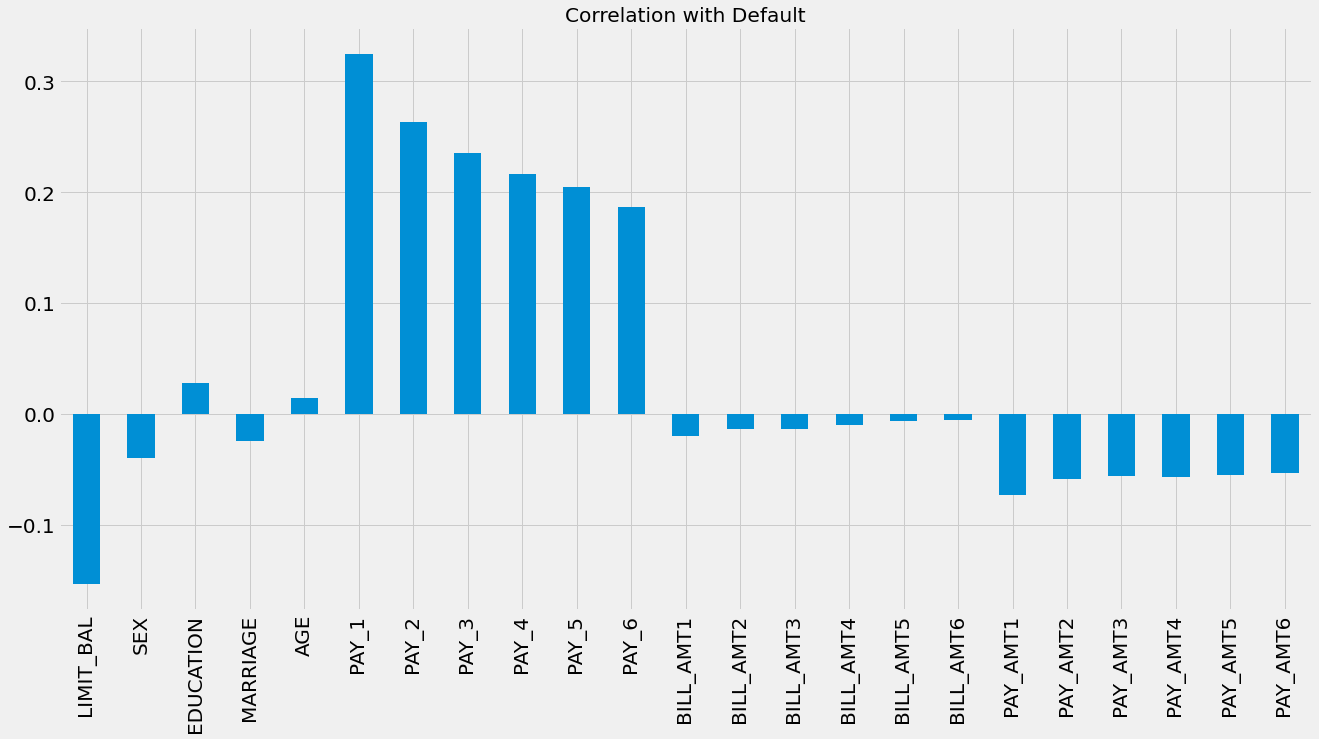

In [40]:
X = dataset.drop(['def_pay'],axis=1)
X.corrwith(dataset['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

<b>It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.

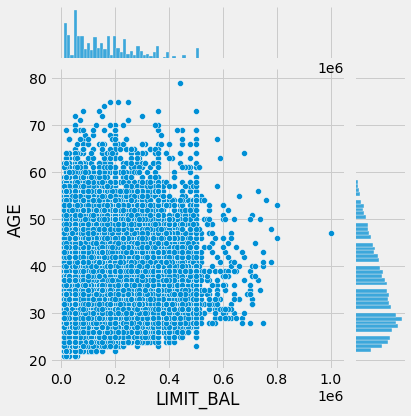

In [41]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=dataset,kind="scatter")

### <b>Facet Grid

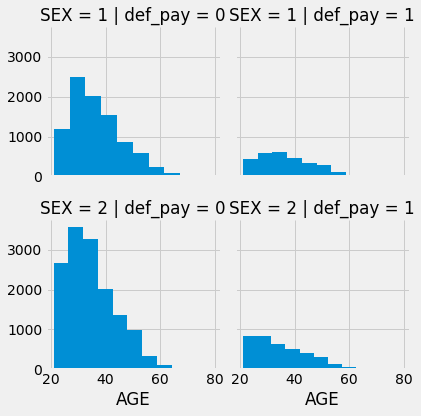

In [42]:
g = sns.FacetGrid(dataset, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')

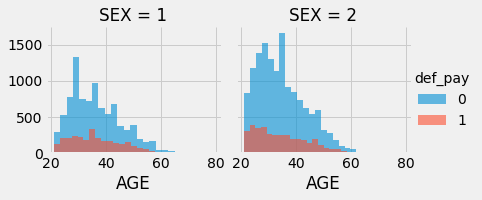

In [43]:
g = sns.FacetGrid(dataset, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

<b>From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of Female age between 30-40years

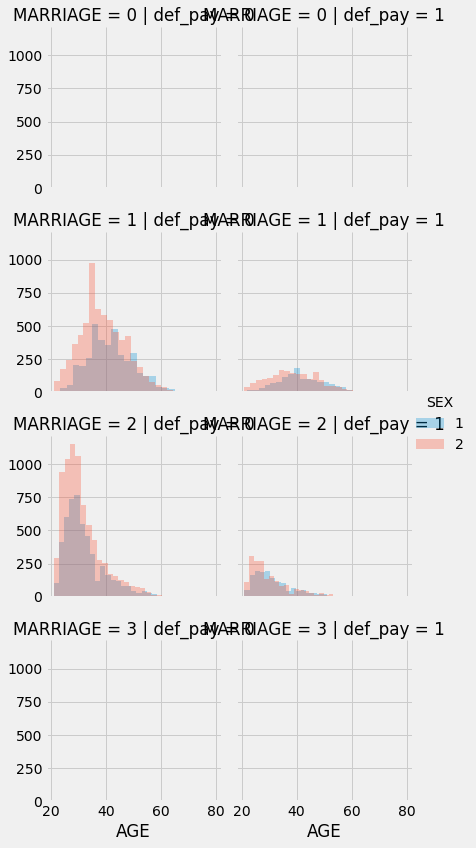

In [44]:
g = sns.FacetGrid(dataset, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

## <font size="+2" color='#154085'> <b>4: Data Cleaning

<b>EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.

MARRIAGE has a label 0 that is undocumented

Data Transformation

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

Thus is a good occasion to learn how to use the .loc function

In [45]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [46]:
dataset['EDUCATION'].value_counts(dropna = False)

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [47]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [48]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [49]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [50]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
dataset.PAY_1.value_counts()
fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
dataset.PAY_2.value_counts()
fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
dataset.PAY_3.value_counts()
fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
dataset.PAY_4.value_counts()
fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
dataset.PAY_5.value_counts()
fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
dataset.PAY_6.value_counts()

0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

In [51]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,0,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,0,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


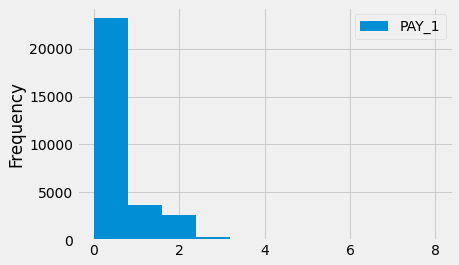

In [53]:
dataset.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [54]:
dataset['PAY_1'].describe()

count    30000.000000
mean         0.356767
std          0.760594
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: PAY_1, dtype: float64

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [56]:
dataset.SEX.nunique()

2

In [57]:
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [58]:
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [59]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

###<b>One Hot encoding for categorical variable



In [60]:
categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4',
                   'PAY_5','PAY_6']
dataset[categorical_vars] = dataset[categorical_vars].astype(str)
dataset = pd.get_dummies(dataset,columns=categorical_vars,drop_first=True)
dataset.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,0,0,0,0,0
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,0,0,0,0,0
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,0,0,0,0,0,0


In [61]:
dataset.shape

(30000, 67)

In [62]:
dataset.columns = dataset.columns.map(str.lower)

In [63]:
dataset.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_5_6,pay_5_7,pay_5_8,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
2,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
3,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,0,0,0,0,0
4,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,0,0,0,0,0
5,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,0,0,0,0,0,0


## <font size="+2" color='#154085'> <b> 5: Feature Scaling of Numerical Attributes

In [64]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
dataset[col_to_norm] = dataset[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [65]:
dataset.head(10)

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_5_6,pay_5_7,pay_5_8,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,0,0,0,0,0,0,0,0,0,0
2,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,0,0,0,1,0,0,0,0,0,0
3,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,0,0,0,0,0,0,0,0,0,0
4,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,0,0,0,0,0,0,0,0,0,0
5,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,0,0,0,0,0,0,0,0,0,0
6,-0.905498,0.164303,0.178947,0.110856,0.152777,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,...,0,0,0,0,0,0,0,0,0,0
7,2.562830,-0.703588,4.301531,5.098086,5.739063,7.762727,7.281574,7.305617,2.978712,1.479085,...,0,0,0,0,0,0,0,0,0,0
8,-0.520128,-1.354506,-0.534359,-0.685644,-0.669262,-0.669062,-0.665674,-0.643203,-0.318999,-0.230905,...,0,0,0,0,0,0,0,0,0,0
9,-0.211833,-0.812074,-0.542385,-0.492930,-0.503332,-0.482684,-0.469082,-0.590276,-0.140952,-0.256990,...,0,0,0,0,0,0,0,0,0,0


In [66]:
dataset.tail(10)

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_5_6,pay_5_7,pay_5_8,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
ID,,,,,,,,,,,,,,,,,,,,,
29991,-0.211833,0.598248,1.182890,1.235910,1.328035,1.476705,0.154016,0.121727,0.020312,0.046824,...,0,0,0,0,0,0,0,0,0,0
29992,0.327685,-0.161156,-0.661690,-0.655858,-0.641879,-0.633636,-0.621938,-0.610745,-0.341942,-0.256990,...,0,0,0,1,0,0,0,0,0,0
29993,-1.213794,0.815221,-0.576106,-0.544860,-0.677929,-0.672497,-0.663059,-0.652724,-0.221191,-0.256990,...,0,0,0,0,0,0,0,0,0,0
29994,-0.520128,0.272789,-0.654330,-0.670934,0.807271,0.425343,0.479662,0.270888,-0.221191,4.594644,...,0,0,0,0,0,0,0,0,0,0
29995,-0.674276,-0.161156,0.289723,0.400842,0.466787,0.532490,0.695695,0.710059,0.080687,-0.105083,...,0,0,0,1,0,0,0,0,0,0
29996,0.404759,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,...,0,0,0,0,0,0,0,0,0,0
29997,-0.134759,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,...,0,0,0,0,0,0,0,0,0,0
29998,-1.059646,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,...,0,0,0,0,0,0,0,0,0,0
29999,-0.674276,0.598248,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,...,0,0,0,0,0,0,0,0,0,0


## <font size="+2" color='#154085'> <b>6: Spiliting Dataset into training(70%) and test set(30%)

In [67]:

from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [68]:
X_train.shape

(21000, 66)

In [69]:
X_test.shape

(9000, 66)

## <font size="+2" color='#154085'> <b>7: Applying Machine Learning Algorithm for Classification Problem

<b>Logistic Regression<b>

In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [70]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [71]:
y_pred = logmodel.predict(X_test)

In [72]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.0,0.0,0.0,0.0


###<b>Stochastic Gradient Descent


Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.It is on of the Gradient Descent Algorithm.It uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.

In [73]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [74]:
y_pred = sgd.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model

,Model,Accuracy,Precision,Recall,F1 Score
0,Stochastic Gradient Descent,1.0,0.0,0.0,0.0


### <font size="+2" color='#154085'> <b>K-Nearest Neighbour
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

* Load the data

* Initialise the value of k

* For getting the predicted class, iterate from 1 to total number of training data points

* Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.

* Sort the calculated distances in ascending order based on distance values

* Get top k rows from the sorted array

* Get the most frequent class of these rows

* Return the predicted class

Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

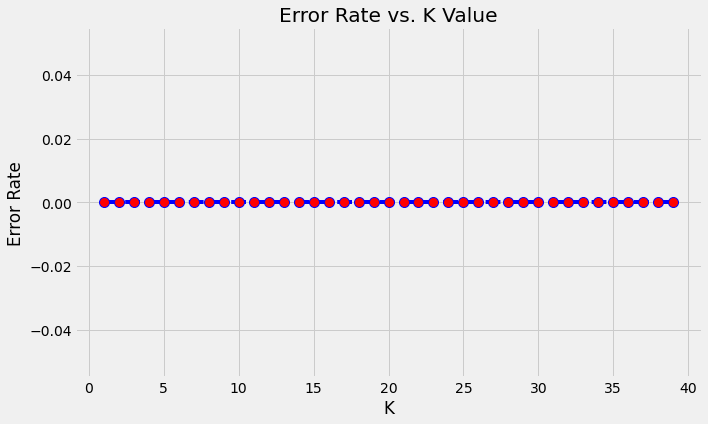

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [80]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
res

,Model,Accuracy,Precision,Recall,F1 Score
0,K-Nearest Neighbour,1.0,0.0,0.0,0.0


### <font size="+2" color='#154085'> <b>Support Vector Machine
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [80]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

In [80]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

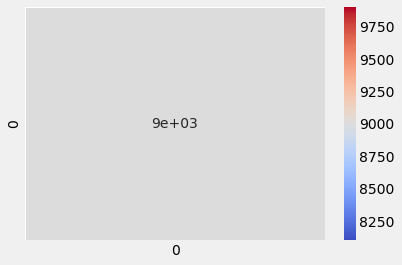

In [84]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [87]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model

,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machine,1.0,0.0,0.0,0.0


###  <font size="+2" color='#154085'> <b>Gaussian Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [89]:
y_pred =naive_bayes.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [93]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model

,Model,Accuracy,Precision,Recall,F1 Score
0,Gaussian Naive Bayes,0.994,0.0,0.0,0.0


### <font size="+2" color='#154085'> <b>Decision Tree Classification
The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

### <b> Advantages of Decision Trees
Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

###<b> Disadvantages of Decision Trees
Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.Decision Tree Classification
The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.


In [94]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [95]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [96]:
y_pred = dct.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [98]:
cm

array([[8998,    2],
       [   0,    0]])

In [100]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree Classifier,0.999778,0.0,0.0,0.0


## <font size="+2" color='#154085'> <b>8:Random Forest Classification
Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

###<b>1:- Pick at random K data points from the training set

###<b>2:- Build the Decision tree associated to these K data points

###<b>3:- Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

###<b>4:- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [103]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random tree Classifier,0.999778,0.0,0.0,0.0


## <font size="+2" color='#154085'> <b>8: Model Optimization using Grid Search and K-Fold Cross validation

There is a better way that I know to get your parameters right, which is to use GridSearchCV. Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters.

In [108]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_curve,auc  
from sklearn.metrics import roc_auc_score

### <font size="+2" color='#154085'> <b> Grid Search on Logistic Regression Model

In [109]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

In [110]:
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)

In [112]:
grid_search_log = grid_search_log.fit(X_train,y_train)


In [113]:
best_accuracy = grid_search_log.best_score_

In [114]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.999904761904762


In [115]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 0.001, 'class_weight': None, 'penalty': 'l2'}

In [117]:
y_pred_log = grid_search_log.predict(X_test)

acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [118]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Tuned,1.0,0.0,0.0,0.0


##<font size="+2" color='#154085'> <b> Conclusion
1)Using a Logistic Regression classifier, we can predict with 82.5% accuracy, whether a customer is likely to default next month.

2)Using a Stochastic Gradient Descent classifier, we can predict with 83.33% accuracy, whether a customer is likely to default next month.

3)Using a Support Vector Machine classifier, we can predict with 80.83% accuracy, whether a customer is likely to default next month.

4)Using a K-Nearest Neighbour classifier, we can predict with 80.83% accuracy, whether a customer is likely to default next month.

5)Using a Decision Tree classifier, we can predict with 82.83% accuracy, whether a customer is likely to default next month.

6)Using a Random Forest classifier, we can predict with 81% accuracy, whether a customer is likely to default next month.

7)Using a XGBOOST classifier, we can predict with 82.16% accuracy, whether a customer is likely to default next month.

The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

We found that using Stochastic Gradient Descent and Decision Tree are better.

Demographics: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.